Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics

Importing Dataset

In [2]:
df=pd.read_csv('bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.shape

(2713, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Exploratory Data Analysis

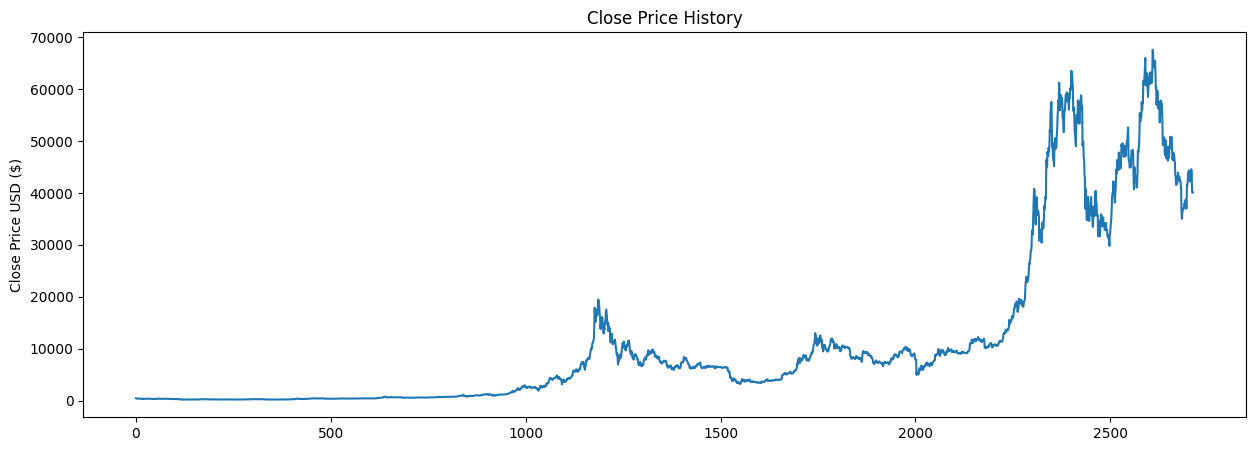

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Close Price History')
plt.ylabel('Close Price USD ($)')
plt.show()

In [7]:
df[df['Close']==df['Adj Close']].shape

(2713, 7)

In [9]:
df.drop(['Adj Close'], axis=1, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [10]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


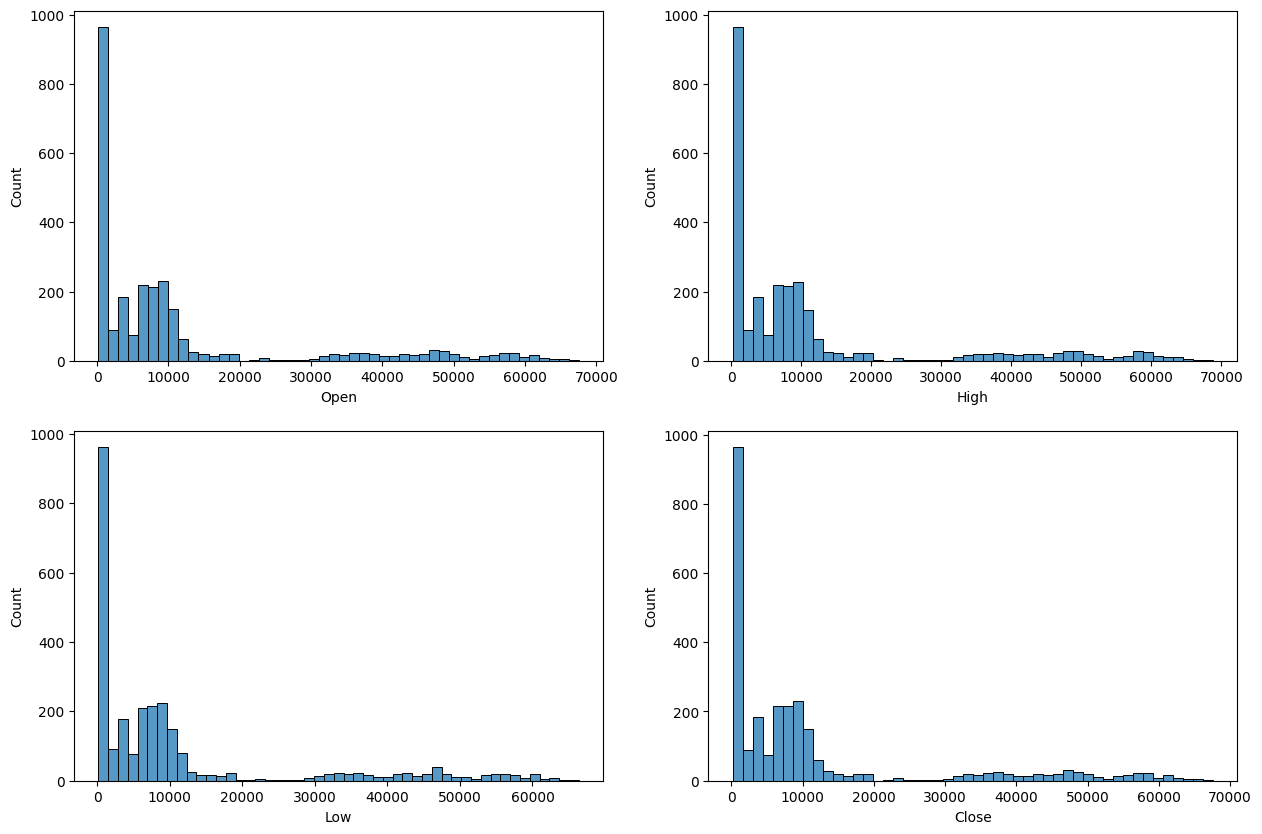

In [20]:
feature=['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(15, 10))
for i, col in enumerate(feature):
  plt.subplot(2, 2, i+1)
  sns.histplot(df[col])
plt.show()

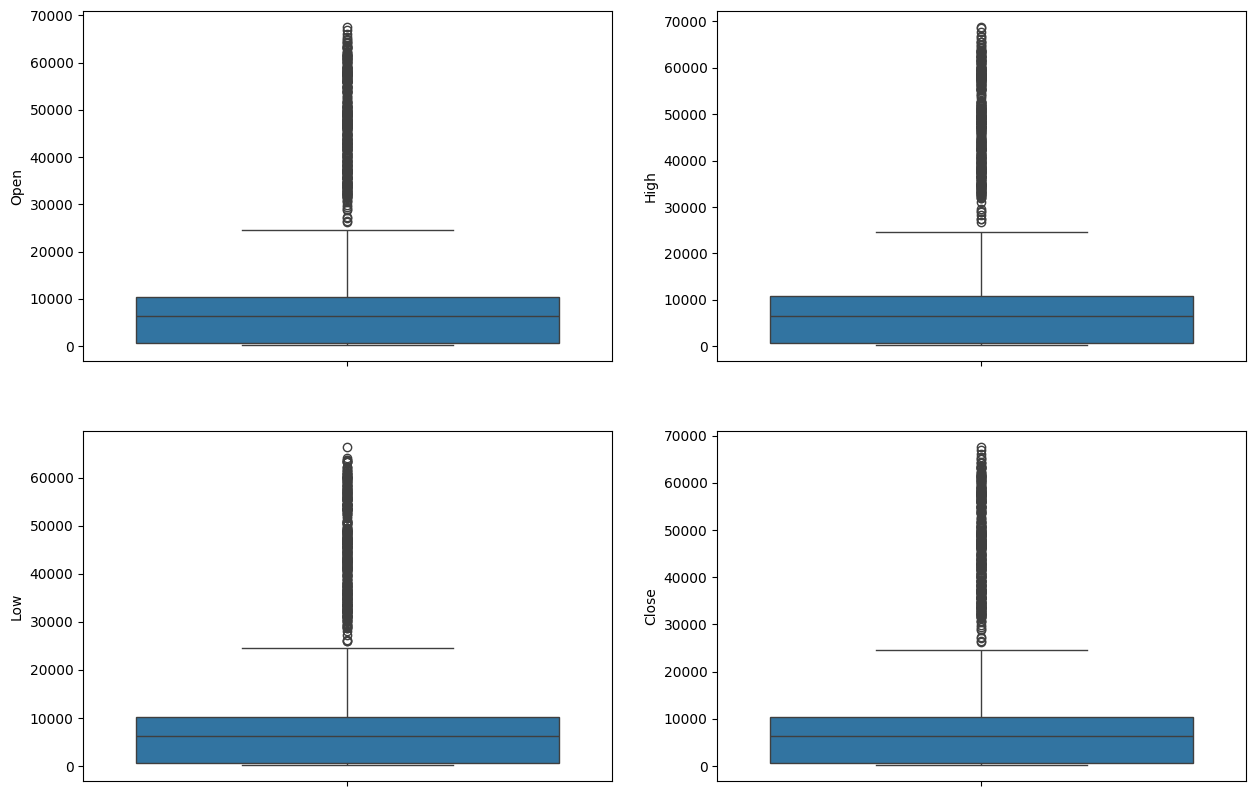

In [22]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature):
  plt.subplot(2, 2, i+1)
  sns.boxplot(df[col])
plt.show()

Feature Engineering

In [23]:
splitted=df['Date'].str.split('-', expand=True)
splitted.head()

,0,1,2
0,2014,09,17
1,2014,09,18
2,2014,09,19
3,2014,09,20
4,2014,09,21


In [26]:
df['year']=splitted[0].astype(int)
df['month']=splitted[1].astype(int)
df['day']=splitted[2].astype(int)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


In [28]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


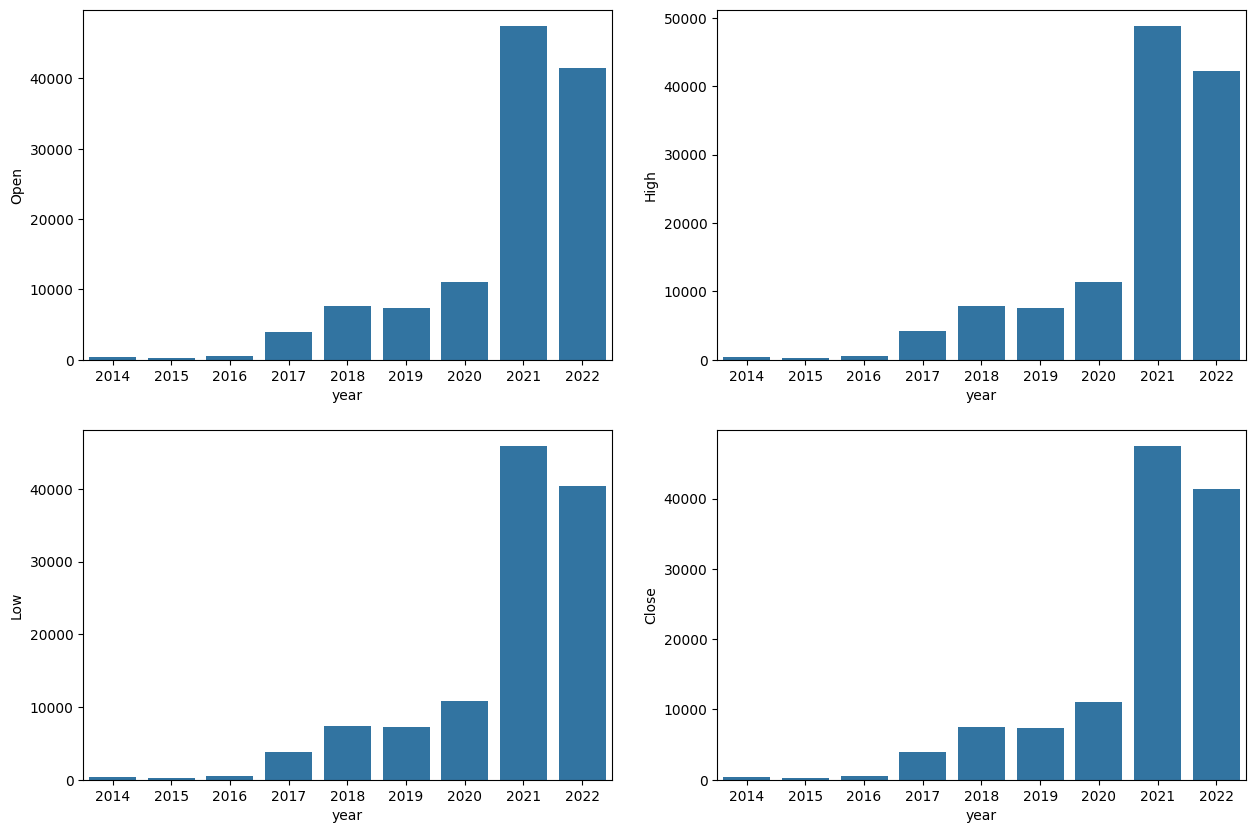

In [30]:
df_grouped=df.groupby('year').mean()
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature):
  plt.subplot(2, 2, i+1)
  sns.barplot(df_grouped[col])
plt.show()

In [32]:
df['is_quarter_end']=np.where(df['month']%3==0, 1, 0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [34]:
df['open-close']=df['Open']-df['Close']
df['low-high']=df['Low']-df['High']
df['target']=np.where(df['Close'].shift(-1)>df['Close'], 1, 0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1


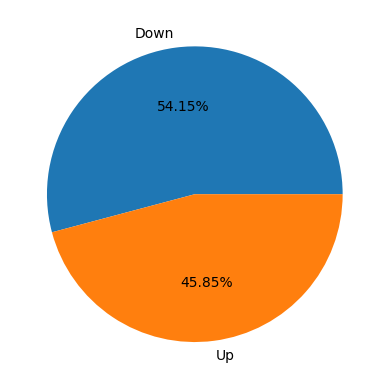

In [39]:
plt.pie(df['target'].value_counts(), labels=['Down', 'Up'], autopct='%1.2f%%')
plt.show()

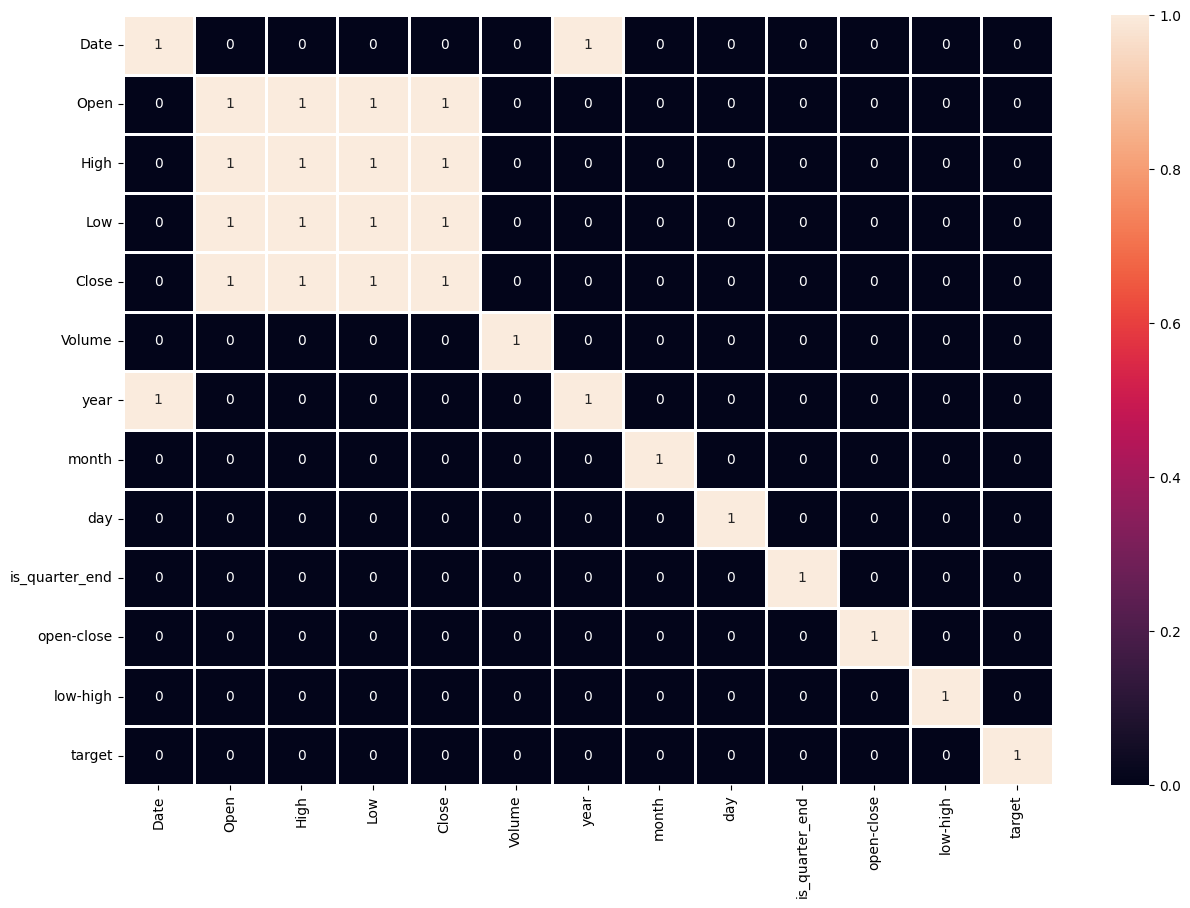

In [44]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr()>0.9, annot=True, linewidths=1)
plt.show()

In [45]:
features=df[['open-close', 'low-high', 'is_quarter_end']]
target=df['target']

scaler=StandardScaler()
features=scaler.fit_transform(features)

X_train, X_test, y_train, y_test=train_test_split(features, target, test_size=0.3, random_state=42)

Model Deplyment

In [61]:
import sklearn

In [67]:
models={
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(kernel='rbf', probability=True),
    'XGB Classifier':XGBClassifier()}

for i, model in models.items():
  model.fit(X_train, y_train)
  print(i)
  print('Training Accuracy:', metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))
  print('Testing Accuracy:', metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
  scores = sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
  print("Cross-validated ROC AUC:", scores.mean())
  print('-'*100)

Logistic Regression
Training Accuracy: 0.5319642853158836
Testing Accuracy: 0.5117827868852459
Cross-validated ROC AUC: 0.5169553008564846
----------------------------------------------------------------------------------------------------
SVC
Training Accuracy: 0.5497156523931381
Testing Accuracy: 0.5096238290398126
Cross-validated ROC AUC: 0.5237508266721322
----------------------------------------------------------------------------------------------------
XGB Classifier
Training Accuracy: 0.9422397310243429
Testing Accuracy: 0.46673741217798603
Cross-validated ROC AUC: 0.4903343705553175
----------------------------------------------------------------------------------------------------


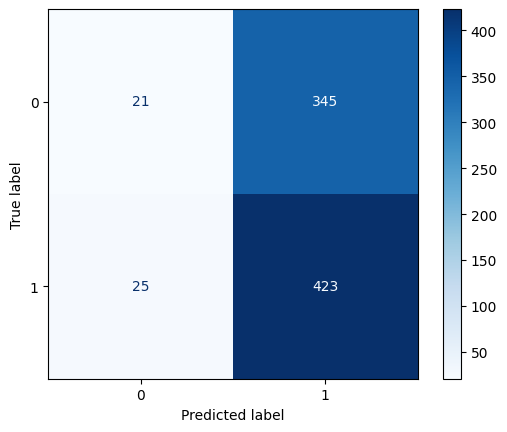

In [65]:
metrics.ConfusionMatrixDisplay.from_estimator(models['Logistic Regression'], X_test, y_test, cmap='Blues')
plt.show()